<a href="https://colab.research.google.com/github/Abinaya-S17/CodSoft/blob/main/codsoft.ipynb" target="_parent"><img src="https://colab.research.google.com/assets/colab-badge.svg" alt="Open In Colab"/></a>

In [ ]:
import numpy as np
import pandas as pd
import matplotlib.pyplot as plt
import seaborn as sns
from sklearn.feature_extraction.text import TfidfVectorizer
from sklearn.model_selection import train_test_split
from sklearn.naive_bayes import MultinomialNB  # Typo fixed: MultinominalNB -> MultinomialNB
from sklearn.metrics import accuracy_score, confusion_matrix, classification_report, r2_score  # Typo fixed: metrices -> metrics
from sklearn.preprocessing import LabelEncoder
from sklearn.linear_model import LogisticRegression
from sklearn.preprocessing import StandardScaler  # Typo fixed: StandardScaler imported correctly
from sklearn.svm import LinearSVC


In [ ]:
df = pd.read_csv("/content/train_data.txt",sep=":::",names=['NO','MOVIE_NAME','GENRE','DESCRIPTION'])

<ipython-input-9-b1a88c6dadca>:1: ParserWarning: Falling back to the 'python' engine because the 'c' engine does not support regex separators (separators > 1 char and different from '\s+' are interpreted as regex); you can avoid this warning by specifying engine='python'.
  df = pd.read_csv("/content/train_data.txt",sep=":::",names=['NO','MOVIE_NAME','GENRE','DESCRIPTION'])


In [ ]:
print(df)

          NO                          MOVIE_NAME        GENRE  \
0          1       Oscar et la dame rose (2009)        drama    
1          2                       Cupid (1997)     thriller    
2          3   Young, Wild and Wonderful (1980)        adult    
3          4              The Secret Sin (1915)        drama    
4          5             The Unrecovered (2007)        drama    
...      ...                                 ...          ...   
19161  19162                    Granitza (1994)        drama    
19162  19163                     Vintage (????)        drama    
19163  19164               Slaughterbots (2017)        short    
19164  19165                Dwitiyo Ripu (2015)        drama    
19165  19166       "Soldiers of Fortune" (1955)    adventure    

                                             DESCRIPTION  
0       Listening in to a conversation between his do...  
1       A brother and sister with a past incestuous r...  
2       As the bus empties the students fo

In [ ]:
test_data=pd.read_csv("/content/train_data.txt",sep=":::",names=['NO','MOVIE_NAME','GENRE','DESCRIPTION'])

<ipython-input-11-10c47e8aa7bc>:1: ParserWarning: Falling back to the 'python' engine because the 'c' engine does not support regex separators (separators > 1 char and different from '\s+' are interpreted as regex); you can avoid this warning by specifying engine='python'.
  test_data=pd.read_csv("/content/train_data.txt",sep=":::",names=['NO','MOVIE_NAME','GENRE','DESCRIPTION'])


In [ ]:
test_data_solution=pd.read_csv("/content/test_data_solution.txt",sep=":::",names=['NO','MOVIE_NAME','GENRE','DESCRIPTION'])

<ipython-input-12-439b5a6c1fa0>:1: ParserWarning: Falling back to the 'python' engine because the 'c' engine does not support regex separators (separators > 1 char and different from '\s+' are interpreted as regex); you can avoid this warning by specifying engine='python'.
  test_data_solution=pd.read_csv("/content/test_data_solution.txt",sep=":::",names=['NO','MOVIE_NAME','GENRE','DESCRIPTION'])


In [ ]:
print(test_data)

          NO                                   MOVIE_NAME          GENRE  \
0          1                Oscar et la dame rose (2009)          drama    
1          2                                Cupid (1997)       thriller    
2          3            Young, Wild and Wonderful (1980)          adult    
3          4                       The Secret Sin (1915)          drama    
4          5                      The Unrecovered (2007)          drama    
...      ...                                          ...            ...   
46506  46507                      Girls Night Out (1997)          short    
46507  46508                     Ripped to Shreds (????)         horror    
46508  46509                                Dolls (2006)          short    
46509  46510   Kein Zurück - Studers neuster Fall (2007)          crime    
46510  46511                Let There Be Light (2017/II)    documentary    

                                             DESCRIPTION  
0       Listening in to a co

In [ ]:
print(test_data_solution)

        NO                                        MOVIE_NAME          GENRE  \
0        1                             Edgar's Lunch (1998)       thriller    
1        2                         La guerra de papá (1977)         comedy    
2        3                      Off the Beaten Track (2010)    documentary    
3        4                           Meu Amigo Hindu (2015)          drama    
4        5                                Er nu zhai (1955)          drama    
...    ...                                               ...            ...   
3197  3198                                Challenger (????)          drama    
3198  3199   "Streetball Extreme: Battle for Europe" (2006)          sport    
3199  3200               One Day We Arrived in Japan (2017)    documentary    
3200  3201                                       Tal (????)          drama    
3201  3202                         A Host of Trouble (2005)          short    

                                            DESCRIP

In [ ]:
df['DESCRIPTION'].fillna("",inplace=True)
print(df['DESCRIPTION'])

0         Listening in to a conversation between his do...
1         A brother and sister with a past incestuous r...
2         As the bus empties the students for their fie...
3         To help their unemployed father make ends mee...
4         The film's title refers not only to the un-re...
                               ...                        
19161     An autumn day in the 1970s. In the mountains ...
19162     A psychological dramedy, where a well known A...
19163     In response to growing concerns about autonom...
19164     Raktim Bose is struggling to publish his firs...
19165     Soldiers of Fortune is a 1955 syndicated half...
Name: DESCRIPTION, Length: 19166, dtype: object


In [ ]:
test_data['DESCRIPTION'].fillna("",inplace=True)
print(test_data['DESCRIPTION'])

0         Listening in to a conversation between his do...
1         A brother and sister with a past incestuous r...
2         As the bus empties the students for their fie...
3         To help their unemployed father make ends mee...
4         The film's title refers not only to the un-re...
                               ...                        
46506     On a Friday evening, Manhattan gallery owner ...
46507     A northern Minnesota Doctor is developing a n...
46508     Inspired by a story that appeared in a 1950's...
46509     Detective Claudia Studer (Judith Hofmann) is ...
46510     Let There Be Light follows the story of dedic...
Name: DESCRIPTION, Length: 46511, dtype: object


In [ ]:
vectorizer=TfidfVectorizer(stop_words='english',max_features=1000)
X_train=vectorizer.fit_transform(df['DESCRIPTION'])
X_test=vectorizer.fit_transform(test_data['DESCRIPTION'])
le=LabelEncoder()
Y_train=le.fit_transform(df['GENRE'])
Y_test=le.transform(test_data_solution['GENRE'])
x_train,x_test,y_train,y_test=train_test_split(X_train,Y_train,test_size=0.2,random_state=42)

In [ ]:
v=LinearSVC()
v.fit(x_train,y_train)
prediction=v.predict(x_test)
print("Accuracy:",accuracy_score(y_test,prediction))
print("Classification report:",classification_report(y_test,prediction))

/usr/local/lib/python3.10/dist-packages/sklearn/svm/_classes.py:32: FutureWarning: The default value of `dual` will change from `True` to `'auto'` in 1.5. Set the value of `dual` explicitly to suppress the warning.
  warnings.warn(


Accuracy: 0.5026082420448618
Classification report:               precision    recall  f1-score   support

           0       0.15      0.12      0.14        82
           1       0.44      0.37      0.40        30
           2       0.22      0.15      0.18        54
           3       0.29      0.11      0.16        45
           4       0.00      0.00      0.00        23
           5       0.44      0.44      0.44       512
           6       0.00      0.00      0.00        34
           7       0.61      0.78      0.69       931
           8       0.52      0.67      0.58       956
           9       0.31      0.14      0.19        64
          10       0.00      0.00      0.00        29
          11       0.70      0.47      0.56        15
          12       0.00      0.00      0.00        17
          13       0.50      0.41      0.45       153
          14       0.57      0.55      0.56        55
          15       0.43      0.17      0.24        18
          16       0.20      

In [ ]:
naive=MultinomialNB()
naive.fit(x_train,y_train)

MultinomialNB()

In [ ]:
naive.predict(X_test)

array([8, 8, 7, ..., 5, 8, 8])

Text(0, 0.5, 'y-axis')

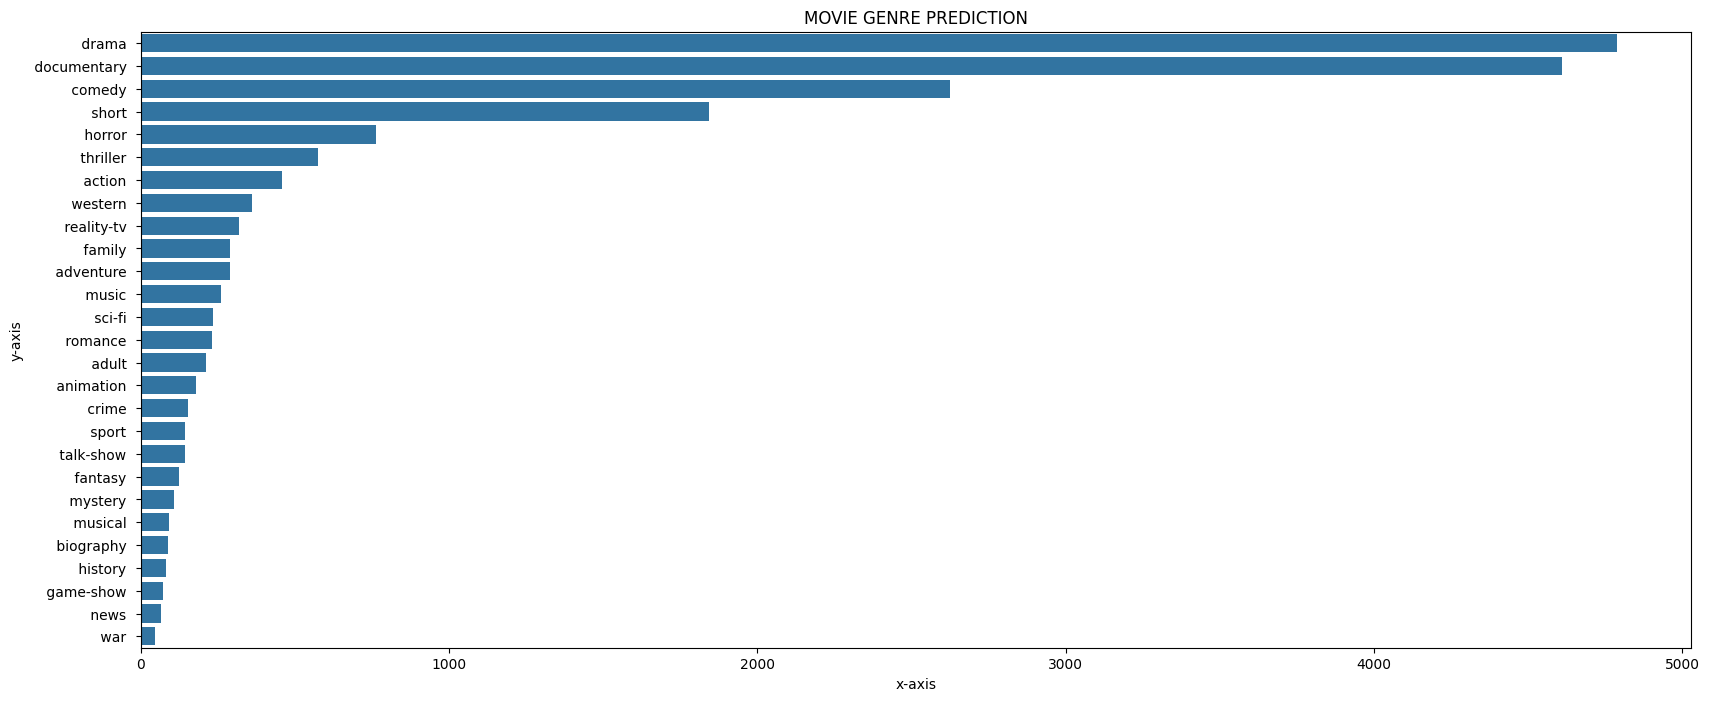

In [ ]:
plt.figure(figsize=(20,8))
sns.countplot(y=df['GENRE'],order=df['GENRE'].value_counts().index)
plt.title("MOVIE GENRE PREDICTION")
plt.xlabel("x-axis")
plt.ylabel("y-axis")

In [ ]:
def movie_pred(description):
  vectorizer_1=vectorizer.transform([description])
  prediction_1=v.predict(vectorizer_1)
  return le.inverse_transform(prediction)[0]
sample="The film's title refers not only to the un-recovered bodies at ground zero, but also to the state of the nation at large. Set in the hallucinatory period of time between September 11 and Halloween of 2001, The Unrecovered examines the effect of terror on the average mind, the way a state of heightened anxiety and/or alertness can cause the average person to make the sort of imaginative connections that are normally made only by artists and conspiracy theorists-both of whom figure prominently in this film. The Unrecovered explores the way in which irony, empathy, and paranoia relate to one another in the wake of 9/11."
print(movie_pred(sample))

 drama 
